This notebook is meant to outline some of the python modules and packages we'll be using during the lab.

Seed the random number generator in numpy for reproducibility of results.

In [1]:
import numpy as np
np.random.seed(127)

There are 5 data sets in the [bug-free-eureka](https://github.com/bit-lsi/bug-free-eureka) repository in [data/exercise01](https://github.com/bit-lsi/bug-free-eureka/tree/master/data/exercise01).

In [2]:
data_dir = 'https://raw.githubusercontent.com/bit-lsi/bug-free-eureka/master/data/exercise01/'

The [requests](http://docs.python-requests.org/en/master/) library allows for the easy access to data through HTTP.

In [3]:
import requests

r = requests.get(data_dir + 'response01.csv')
r

<Response [200]>

The data are returned as text, but pandas needs a file-like object in the read_csv method, so the string is wrapped with the built-in [StringIO](https://docs.python.org/3.5/library/io.html?highlight=stringio).

In [4]:
import io

rio = io.StringIO(r.text)
rio

The data are parsed and contained in a [pandas](http://pandas.pydata.org/pandas-docs/stable/) DataFrame.

In [5]:
import pandas

df = pd.read_csv(rio, header=0, index_col=0)
df.head()

,Response
Node000,-0.135055
Node001,0.264931
Node002,-0.258820
Node003,0.545559
Node004,0.152085


The process is repeated algorithmically for each file.

In [6]:
dfs = []

for i in range(5):
    url = data_dir + 'response{:02}.csv'.format(i)
    response = requests.get(url)
    buffer = io.StringIO(response.text)
    dataframe = pd.read_csv(buffer, header=0, index_col=0)
    dataframe.columns = ['response{:02}'.format(i)]  # rename each file's column so they're unique
    dfs.append(dataframe)

Each file has the same index, so they can be concatenated to a single data frame.

In [7]:
df = pd.concat(dfs, axis=1)
df.head()

,response00,response01,response02,response03,response04
Node000,-0.427561,-0.135055,-0.255436,-2.220150,0.219321
Node001,-0.813055,0.264931,-0.275383,0.112754,-0.729424
Node002,-1.045713,-0.258820,-0.032362,-0.912736,0.543240
Node003,0.153123,0.545559,0.672407,0.722640,0.826312
Node004,0.828324,0.152085,-0.605080,-1.815755,-0.348430


The pairwise similarity is calculated for each row using [SciPy](http://docs.scipy.org/doc/).

In [8]:
from scipy.spatial.distance import squareform, pdist

dist = squareform(pdist(df))

The similarity matrix is thresholded to make a boolean adjacency matrix.

In [9]:
adj = dist > 5.6

A [networkx](https://networkx.readthedocs.io/en/stable/) graph is built from the adjacency matrix.

In [10]:
import networkx as nx

g = nx.from_numpy_matrix(adj)

[Matplotlib](http://matplotlib.org/contents.html) is used to display the resulting graph and its degree distribution.

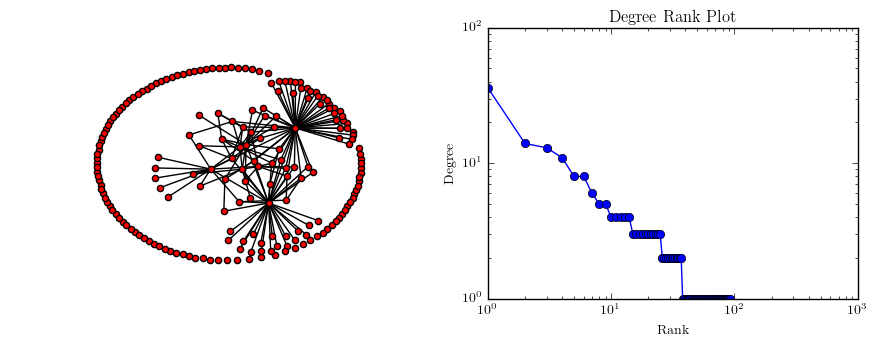

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10.5, 3.5))

nx.draw_spring(g, node_size=20, ax=axes[0])

degree_sequence=sorted(nx.degree(g).values(),reverse=True) # degree sequence
dmax=max(degree_sequence)
axes[1].set_title('Degree Rank Plot')
axes[1].set_xlabel('Rank')
axes[1].set_ylabel('Degree')
axes[1].loglog(degree_sequence,'b-',marker='o')

plt.show()